In [4]:
import pandas as pd
#1. load observations CSV file
observations = pd.read_csv('observations.csv')
#view first 5 rows
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [2]:
#2. load species info csv file
species = pd.read_csv('species_info.csv')
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [5]:
#3. Shape and info
print(observations.shape)
print(observations.info())

(23296, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [6]:
print(species.shape)
print(species.info())

(5824, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [7]:
#4. column names
print(observations.columns)
print(species.columns)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


In [9]:
#5. Summary stats
#Observations
print(observations.describe())

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


In [ ]:
#Insights
#Total number of species observed = 23296
#The average number of species = 142
#Highest number of a single species observed = 321
#least number of a single species observed = 9

In [13]:
#Species
print(species.describe)

<bound method NDFrame.describe of             category                scientific_name  \
0             Mammal  Clethrionomys gapperi gapperi   
1             Mammal                      Bos bison   
2             Mammal                     Bos taurus   
3             Mammal                     Ovis aries   
4             Mammal                 Cervus elaphus   
...              ...                            ...   
5819  Vascular Plant               Solanum parishii   
5820  Vascular Plant                  Solanum xanti   
5821  Vascular Plant         Parthenocissus vitacea   
5822  Vascular Plant              Vitis californica   
5823  Vascular Plant            Tribulus terrestris   

                                           common_names conservation_status  
0                              Gapper's Red-Backed Vole                 NaN  
1                                 American Bison, Bison                 NaN  
2     Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                

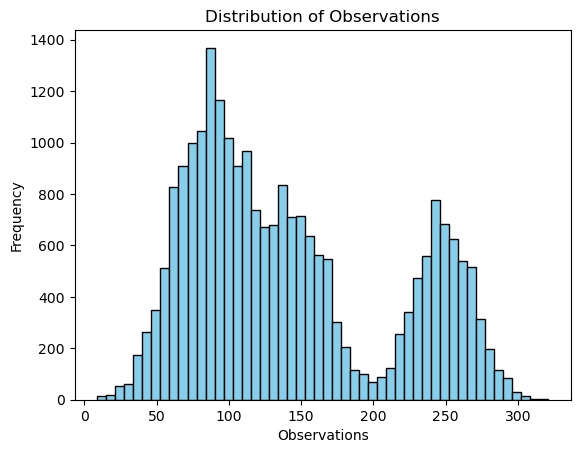

In [27]:
#6. Visualization
#distribution
import matplotlib.pyplot as plt
plt.hist(observations ['observations'], bins = 50, color= 'skyblue', edgecolor = 'black')
plt.title('Distribution of Observations')
plt.xlabel('Observations')
plt.ylabel('Frequency')
plt.show()

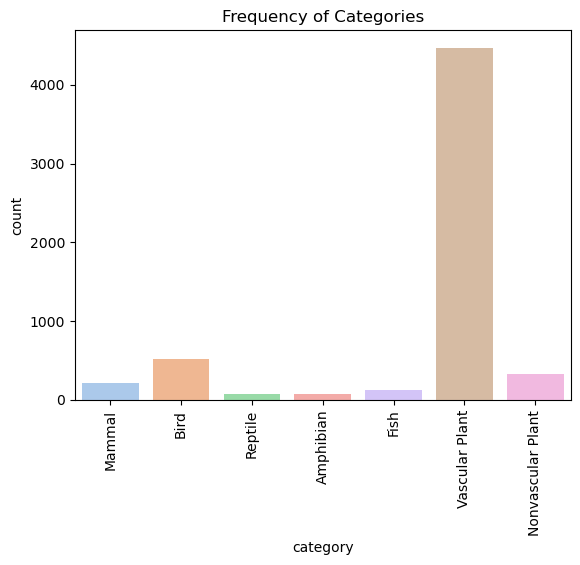

In [35]:
# share of species categories
import seaborn as sns
sns.countplot(data = species, x = 'category', palette = 'pastel', hue = 'category', legend = False )
plt.title('Frequency of Categories')
plt.xticks(rotation = 90)
plt.show()

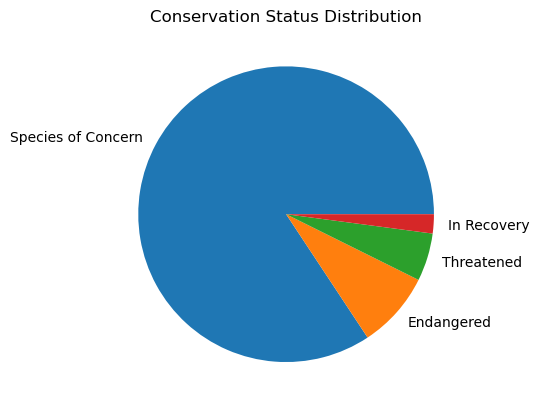

In [36]:
#percentage of conservaton status
species['conservation_status']. value_counts().plot.pie()
plt.ylabel('')
plt.title('Conservation Status Distribution')
plt.show()

In [ ]:
#More Insights
# Vascular plants are the most popular category
# Amphibians are the least popualr category
# There are more species of concern than other categories
# The least proportion of species are in recovery

In [39]:
#7. Significance
import scipy
from scipy.stats import chi2_contingency
#contingency table
table = pd.crosstab(species['category'], species['conservation_status'])
#chi-square test
chi2, p, dof, expect = chi2_contingency(table)
print(f'Chi-square statistic = {chi2}')
print (f'p-value = {p}')

Chi-square statistic = 53.91636314015659
p-value = 1.8909788349761653e-05


In [ ]:
#p-val (0.18) > 0.05
#There differences between species and their conservation status is not significant - species type does not affect the conservation status.

In [ ]:
#Conclusion
#Interesting and enlightening project, shows the extensive scope of exploratory data analysis.
#Most of the results turned out as anticipated, except for the part of significance of differences between species and their conservation status
#Key findings: ** (a) species are evenly distributed (b) vascular plants are the most observed category (c) highest proportion of species are of concern status, least proportion are in recovery. 